In [1]:
import pandas as pd
import numpy as np
#insert your directory here
directory = 'C:\\Users\\olive\\OneDrive\\Uni\\Second Year\\Data Science\\Assignment 2\\'
bball_file_name = 'nba.games.stats.csv'
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
ball_original = pd.read_csv(directory+bball_file_name, sep = ',', parse_dates = ['Date'], date_parser=dateparse, decimal = '.')

In [3]:
#Check data types
ball_original.dtypes

Unnamed: 0                           int64
Team                                object
Game                                 int64
Date                        datetime64[ns]
Home                                object
Opponent                            object
WINorLOSS                           object
TeamPoints                           int64
OpponentPoints                       int64
FieldGoals                           int64
FieldGoalsAttempted                  int64
FieldGoals.                        float64
X3PointShots                         int64
X3PointShotsAttempted                int64
X3PointShots.                      float64
FreeThrows                           int64
FreeThrowsAttempted                  int64
FreeThrows.                        float64
OffRebounds                          int64
TotalRebounds                        int64
Assists                              int64
Steals                               int64
Blocks                               int64
Turnovers  

In [4]:
#Check missing values
ball_NaN = ball_original[ball_original.isnull().any(axis=1)] 
ball_NaN

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls


In [6]:
#Categorical sanity checks
print ball_original['Team'].unique()

['ATL' 'BOS' 'BRK' 'CHO' 'CHI' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU' 'IND'
 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NOP' 'NYK' 'OKC' 'ORL' 'PHI' 'PHO'
 'POR' 'SAC' 'SAS' 'TOR' 'UTA' 'WAS']


In [7]:
print ball_original['Home'].unique()

['Away' 'Home']


In [8]:
print ball_original['Opponent'].unique()

['TOR' 'IND' 'SAS' 'CHO' 'NYK' 'UTA' 'MIA' 'CLE' 'LAL' 'DET' 'WAS' 'NOP'
 'BOS' 'BRK' 'DEN' 'PHI' 'ORL' 'CHI' 'HOU' 'DAL' 'LAC' 'MIL' 'POR' 'MEM'
 'OKC' 'MIN' 'GSW' 'SAC' 'PHO' 'ATL']


In [9]:
print ball_original['WINorLOSS'].unique()

['L' 'W']


In [11]:
#Drop unnamed column and filter dataset to only home observations for KNN model
ball = ball_original[(ball_original['Home'] == "Home")]
ball = ball.drop('Unnamed: 0',axis=1)
ball.shape

(4920, 40)

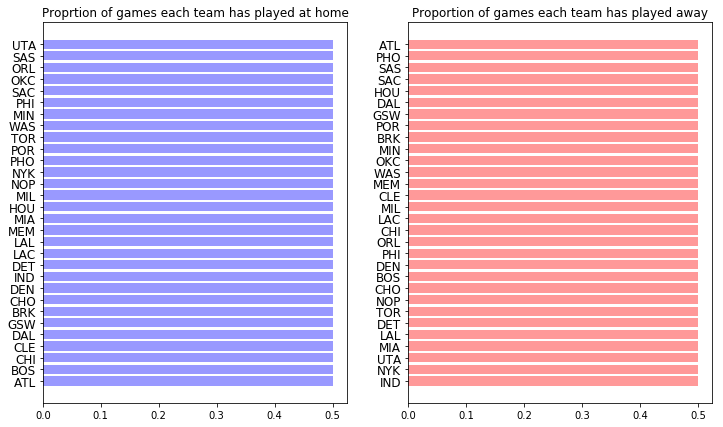

In [12]:
#Data Expploration
import matplotlib.pyplot as plt
import numpy as np

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
f.set_figheight(7)
f.set_figwidth(12)

hometeams = ball['Team'].unique()
hometeams_count = np.arange(len(hometeams))
hometeams_bar  = ball['Team'].value_counts()/(ball['Opponent'].value_counts() + ball['Team'].value_counts()).tolist()
ax1.set_title('Proprtion of games each team has played at home')
ax1.barh(hometeams_count,hometeams_bar, color="b", alpha=0.4, align="center")
ax1.set_yticklabels(hometeams, fontsize = 12)
ax1.set_yticks(hometeams_count)

awayteams = ball['Opponent'].unique()
awayteams_count = np.arange(len(hometeams))
awayteams_bar  = ball['Team'].value_counts()/(ball['Opponent'].value_counts() + ball['Team'].value_counts()).tolist()
ax2.set_title('Proportion of games each team has played away')
ax2.barh(awayteams_count,awayteams_bar, color="r", alpha=0.4, align="center")
ax2.set_yticklabels(awayteams, fontsize = 12)
ax2.set_yticks(awayteams_count)
plt.show()
plt.clf()

Text(0.5,1,u'Daily NBA Match Frequency across 2018 season')

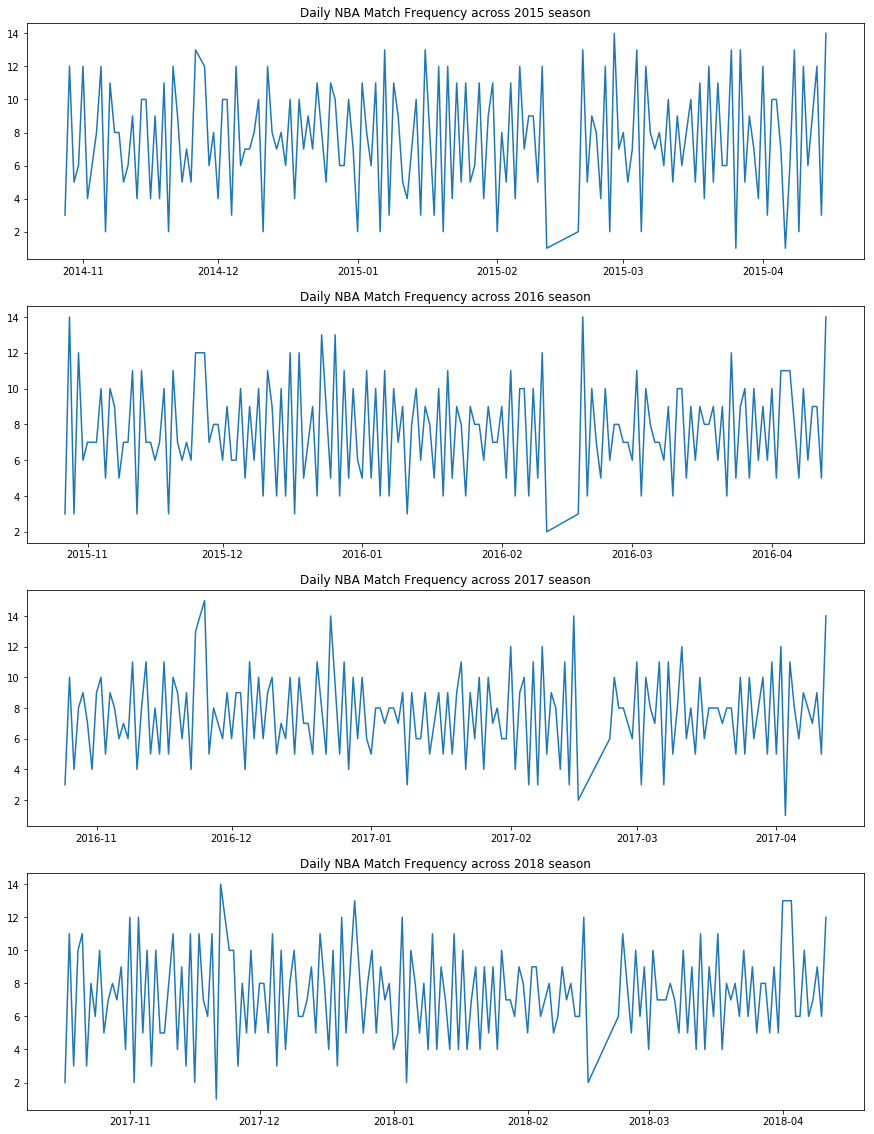

In [13]:
datelist = ball['Date'].sort_values(axis=0)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
f.set_figheight(20)
f.set_figwidth(15)

Season_15 = datelist[(datelist < '2015-08-01')]
counts_15 = Season_15.value_counts().sort_index()
dates_15 = np.sort(pd.Series(Season_15).unique())
ax1.plot(dates_15, counts_15)
ax1.set_title('Daily NBA Match Frequency across 2015 season')

Season_16 = datelist[(datelist > '2015-08-01') & (datelist <= '2016-08-01')]
counts_16 = Season_16.value_counts().sort_index()
dates_16 = np.sort(pd.Series(Season_16).unique())
ax2.plot(dates_16, counts_16)
ax2.set_title('Daily NBA Match Frequency across 2016 season')

Season_17 = datelist[(datelist > '2016-08-01') & (datelist <= '2017-08-01')]
counts_17 = Season_17.value_counts().sort_index()
dates_17 = np.sort(pd.Series(Season_17).unique())
ax3.plot(dates_17, counts_17)
ax3.set_title('Daily NBA Match Frequency across 2017 season')

Season_18 = datelist[(datelist > '2017-08-01') & (datelist <= datelist.max())]
counts_18 = Season_18.value_counts().sort_index()
dates_18 = np.sort(pd.Series(Season_18).unique())
ax4.plot(dates_18, counts_18)
ax4.set_title('Daily NBA Match Frequency across 2018 season')

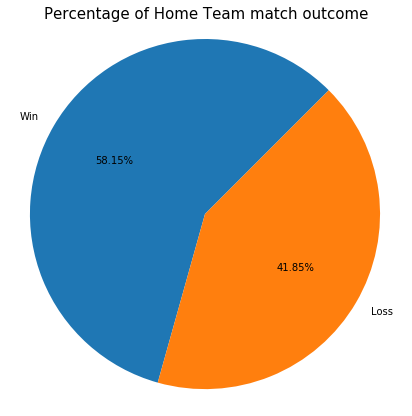

In [7]:
outcome_count = ball['WINorLOSS'].value_counts()
outcome_label = {'Win', 'Loss'}

f, ax = plt.subplots()

ax.pie(outcome_count, labels=outcome_label, startangle=45, autopct='%.2f%%')
ax.set_title('Percentage of Home Team match outcome', fontsize = 15)
ax.axis('equal')
f.set_figheight(7)
f.set_figwidth(7)
plt.show()

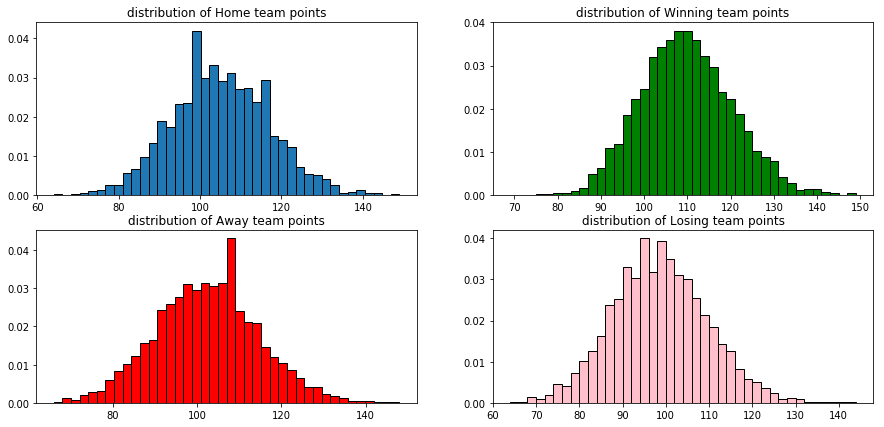

In [8]:
ball['WinPoints'] = np.where(ball['WINorLOSS'] == 'W', ball['TeamPoints'], ball['OpponentPoints'])
ball['LossPoints'] = np.where(ball['WINorLOSS'] == 'L', ball['TeamPoints'], ball['OpponentPoints'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['TeamPoints'], bins = 40, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home team points")
axes[1,0].hist(ball['OpponentPoints'], bins = 40, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away team points")
axes[0,1].hist(ball['WinPoints'], bins = 40, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning team points")
axes[1,1].hist(ball['LossPoints'], bins = 40, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing team points")

plt.show()
plt.clf()

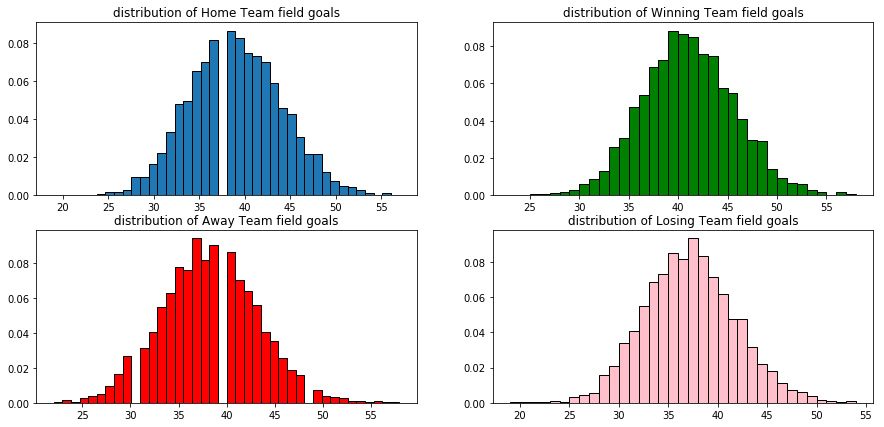

In [9]:
ball['WinFieldGoals'] = np.where(ball['WINorLOSS'] == 'W', ball['FieldGoals'], ball['Opp.FieldGoals'])
ball['LossFieldGoals'] = np.where(ball['WINorLOSS'] == 'L', ball['FieldGoals'], ball['Opp.FieldGoals'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['FieldGoals'], bins = 40, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team field goals")
axes[1,0].hist(ball['Opp.FieldGoals'], bins = 40, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team field goals")
axes[0,1].hist(ball['WinFieldGoals'], bins = 35, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team field goals")
axes[1,1].hist(ball['LossFieldGoals'], bins = 35, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team field goals")

plt.show()
plt.clf()

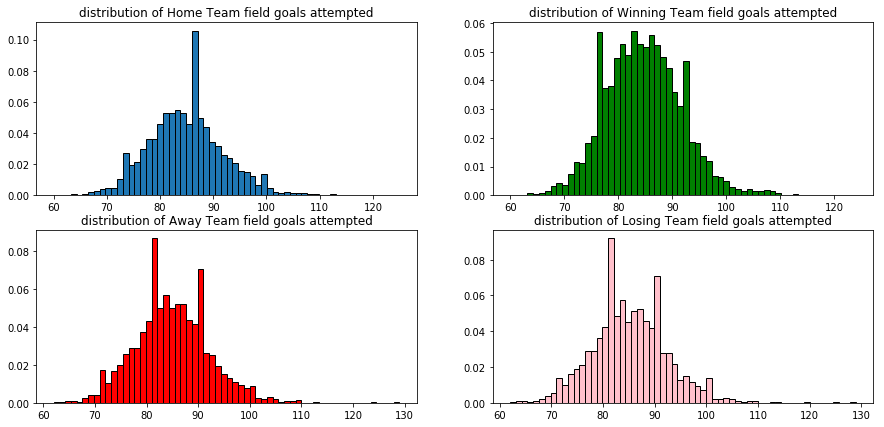

In [10]:
ball['WinFieldGoalsAttempted'] = np.where(ball['WINorLOSS'] == 'W', ball['FieldGoalsAttempted'], ball['Opp.FieldGoalsAttempted'])
ball['LossFieldGoalsAttempted'] = np.where(ball['WINorLOSS'] == 'L', ball['FieldGoalsAttempted'], ball['Opp.FieldGoalsAttempted'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['FieldGoalsAttempted'], bins = 60, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team field goals attempted")
axes[1,0].hist(ball['Opp.FieldGoalsAttempted'], bins = 60, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team field goals attempted")
axes[0,1].hist(ball['WinFieldGoalsAttempted'], bins = 60, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team field goals attempted")
axes[1,1].hist(ball['LossFieldGoalsAttempted'], bins = 60, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team field goals attempted")

plt.show()
plt.clf()

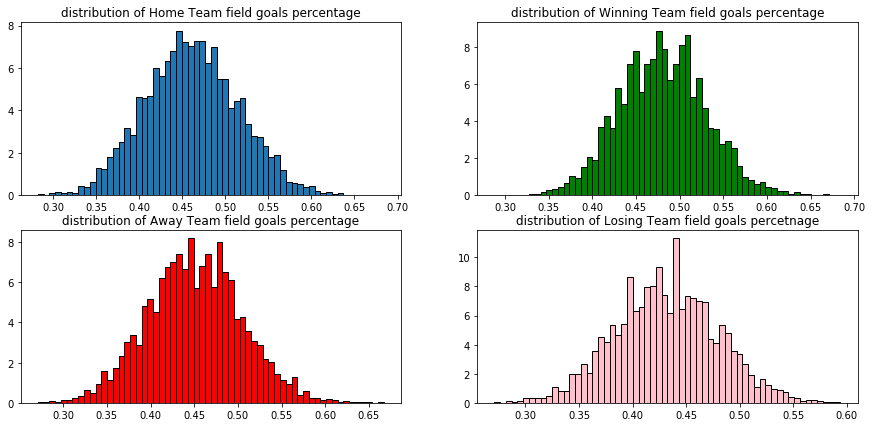

In [11]:
ball['WinFieldGoals.'] = np.where(ball['WINorLOSS'] == 'W', ball['FieldGoals.'], ball['Opp.FieldGoals.'])
ball['LossFieldGoals.'] = np.where(ball['WINorLOSS'] == 'L', ball['FieldGoals.'], ball['Opp.FieldGoals.'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['FieldGoals.'], bins = 60, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team field goals percentage")
axes[1,0].hist(ball['Opp.FieldGoals.'], bins = 60, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team field goals percentage")
axes[0,1].hist(ball['WinFieldGoals.'], bins = 60, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team field goals percentage")
axes[1,1].hist(ball['LossFieldGoals.'], bins = 60, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team field goals percetnage")

plt.show()
plt.clf()

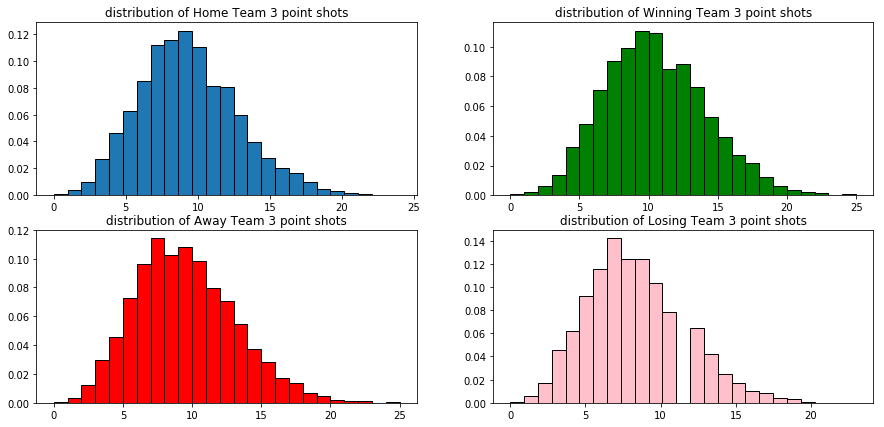

In [12]:
ball['Win3PTShots'] = np.where(ball['WINorLOSS'] == 'W', ball['X3PointShots'], ball['Opp.3PointShots'])
ball['Loss3PTShots'] = np.where(ball['WINorLOSS'] == 'L', ball['X3PointShots'], ball['Opp.3PointShots'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['X3PointShots'], bins = 25, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team 3 point shots")
axes[1,0].hist(ball['Opp.3PointShots'], bins = 25, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team 3 point shots")
axes[0,1].hist(ball['Win3PTShots'], bins = 25, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team 3 point shots")
axes[1,1].hist(ball['Loss3PTShots'], bins = 25, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team 3 point shots")

plt.show()
plt.clf()

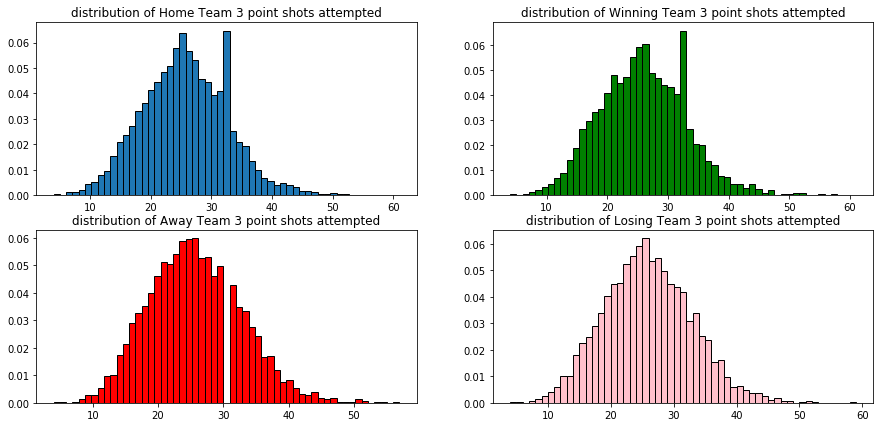

In [13]:
ball['Win3PTAttempted'] = np.where(ball['WINorLOSS'] == 'W', ball['X3PointShotsAttempted'], ball['Opp.3PointShotsAttempted'])
ball['Loss3PTAttempted'] = np.where(ball['WINorLOSS'] == 'L', ball['X3PointShotsAttempted'], ball['Opp.3PointShotsAttempted'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['X3PointShotsAttempted'], bins = 55, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team 3 point shots attempted")
axes[1,0].hist(ball['Opp.3PointShotsAttempted'], bins = 55, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team 3 point shots attempted")
axes[0,1].hist(ball['Win3PTAttempted'], bins = 55, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team 3 point shots attempted")
axes[1,1].hist(ball['Loss3PTAttempted'], bins = 55, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team 3 point shots attempted")

plt.show()
plt.clf()

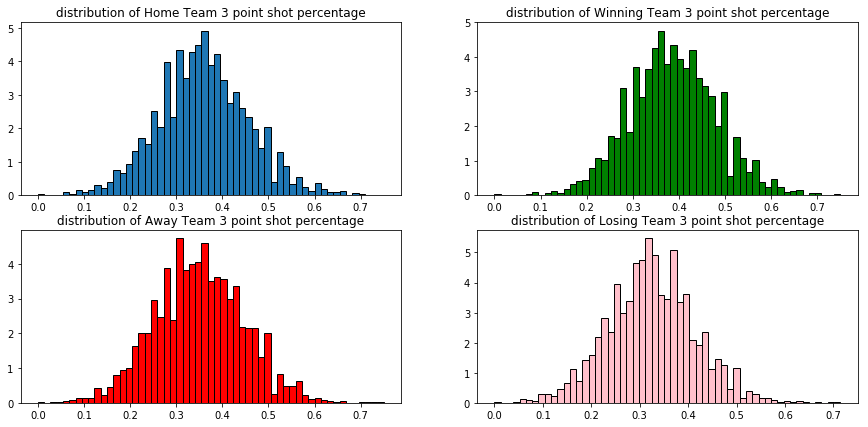

In [14]:
ball['Win3PT.'] = np.where(ball['WINorLOSS'] == 'W', ball['X3PointShots.'], ball['Opp.3PointShots.'])
ball['Loss3PT.'] = np.where(ball['WINorLOSS'] == 'L', ball['X3PointShots.'], ball['Opp.3PointShots.'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['X3PointShots.'], bins = 55, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team 3 point shot percentage")
axes[1,0].hist(ball['Opp.3PointShots.'], bins = 55, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team 3 point shot percentage")
axes[0,1].hist(ball['Win3PT.'], bins = 55, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team 3 point shot percentage")
axes[1,1].hist(ball['Loss3PT.'], bins = 55, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team 3 point shot percentage")

plt.show()
plt.clf()

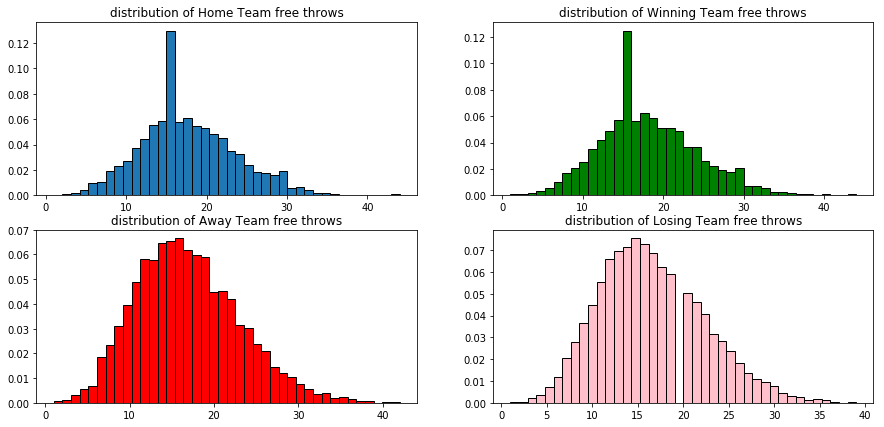

In [15]:
ball['WinFreeThrows'] = np.where(ball['WINorLOSS'] == 'W', ball['FreeThrows'], ball['Opp.FreeThrows'])
ball['LossFreeThrows'] = np.where(ball['WINorLOSS'] == 'L', ball['FreeThrows'], ball['Opp.FreeThrows'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['FreeThrows'], bins = 40, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team free throws")
axes[1,0].hist(ball['Opp.FreeThrows'], bins = 40, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team free throws")
axes[0,1].hist(ball['WinFreeThrows'], bins = 40, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team free throws")
axes[1,1].hist(ball['LossFreeThrows'], bins = 40, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team free throws")

plt.show()
plt.clf()

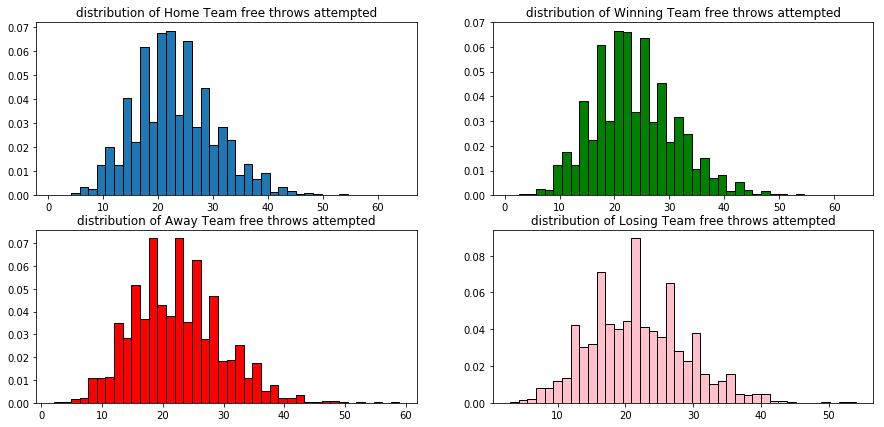

In [16]:
ball['WinFreeThrowsAttempted'] = np.where(ball['WINorLOSS'] == 'W', ball['FreeThrowsAttempted'], ball['Opp.FreeThrowsAttempted'])
ball['LossFreeThrowsAttempted'] = np.where(ball['WINorLOSS'] == 'L', ball['FreeThrowsAttempted'], ball['Opp.FreeThrowsAttempted'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['FreeThrowsAttempted'], bins = 40, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team free throws attempted")
axes[1,0].hist(ball['Opp.FreeThrowsAttempted'], bins = 40, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team free throws attempted")
axes[0,1].hist(ball['WinFreeThrowsAttempted'], bins = 40, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team free throws attempted")
axes[1,1].hist(ball['LossFreeThrowsAttempted'], bins = 40, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team free throws attempted")

plt.show()
plt.clf()

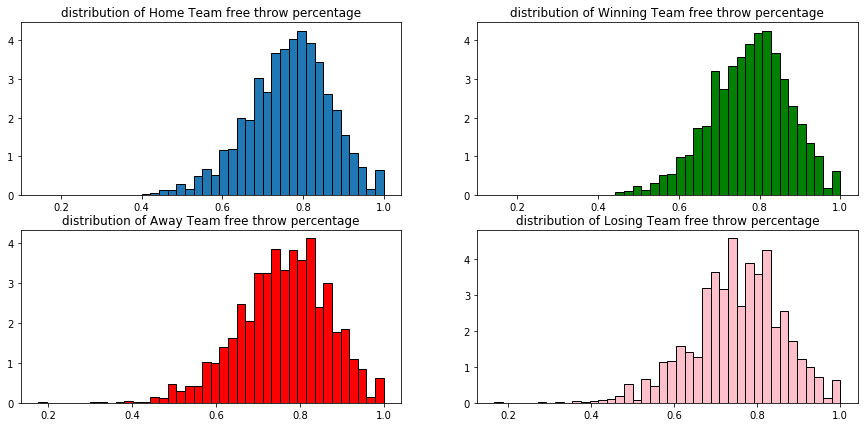

In [17]:
ball['WinFreeThrows.'] = np.where(ball['WINorLOSS'] == 'W', ball['FreeThrows.'], ball['Opp.FreeThrows.'])
ball['LossFreeThrows.'] = np.where(ball['WINorLOSS'] == 'L', ball['FreeThrows.'], ball['Opp.FreeThrows.'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['FreeThrows.'], bins = 40, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team free throw percentage")
axes[1,0].hist(ball['Opp.FreeThrows.'], bins = 40, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team free throw percentage")
axes[0,1].hist(ball['WinFreeThrows.'], bins = 40, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team free throw percentage")
axes[1,1].hist(ball['LossFreeThrows.'], bins = 40, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team free throw percentage")

plt.show()
plt.clf()

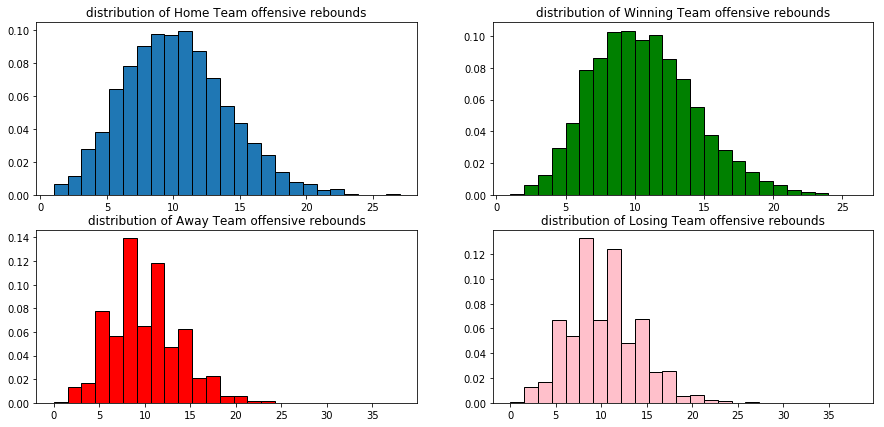

In [18]:
ball['WinOffRebounds'] = np.where(ball['WINorLOSS'] == 'W', ball['OffRebounds'], ball['Opp.OffRebounds'])
ball['LossOffRebounds'] = np.where(ball['WINorLOSS'] == 'L', ball['OffRebounds'], ball['Opp.OffRebounds'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['OffRebounds'], bins = 25, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team offensive rebounds")
axes[1,0].hist(ball['Opp.OffRebounds'], bins = 25, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team offensive rebounds")
axes[0,1].hist(ball['WinOffRebounds'], bins = 25, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team offensive rebounds")
axes[1,1].hist(ball['LossOffRebounds'], bins = 25, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team offensive rebounds")

plt.show()
plt.clf()

#Try transform rebounds data

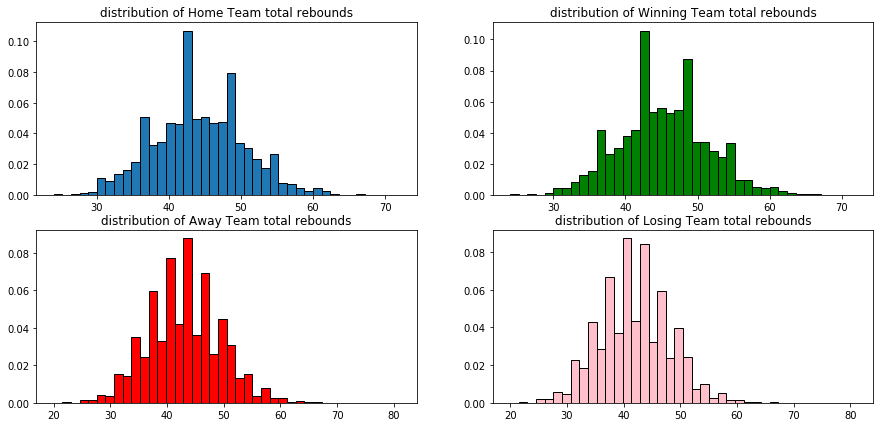

In [19]:
ball['WinTotalRebounds'] = np.where(ball['WINorLOSS'] == 'W', ball['TotalRebounds'], ball['Opp.TotalRebounds'])
ball['LossTotalRebounds'] = np.where(ball['WINorLOSS'] == 'L', ball['TotalRebounds'], ball['Opp.TotalRebounds'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['TotalRebounds'], bins = 40, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team total rebounds")
axes[1,0].hist(ball['Opp.TotalRebounds'], bins = 40, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team total rebounds")
axes[0,1].hist(ball['WinTotalRebounds'], bins = 40, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team total rebounds")
axes[1,1].hist(ball['LossTotalRebounds'], bins = 40, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team total rebounds")

plt.show()
plt.clf()

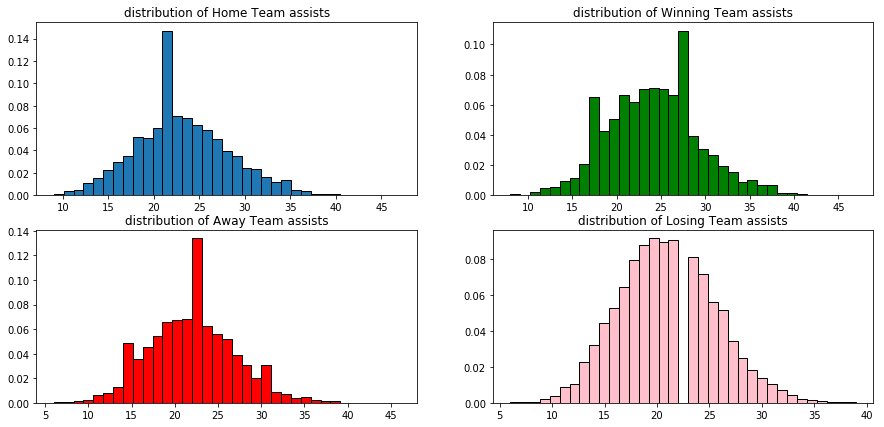

In [20]:
ball['WinAssists'] = np.where(ball['WINorLOSS'] == 'W', ball['Assists'], ball['Opp.Assists'])
ball['LossAssists'] = np.where(ball['WINorLOSS'] == 'L', ball['Assists'], ball['Opp.Assists'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['Assists'], bins = 35, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team assists")
axes[1,0].hist(ball['Opp.Assists'], bins = 35, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team assists")
axes[0,1].hist(ball['WinAssists'], bins = 35, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team assists")
axes[1,1].hist(ball['LossAssists'], bins = 35, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team assists")

plt.show()
plt.clf()

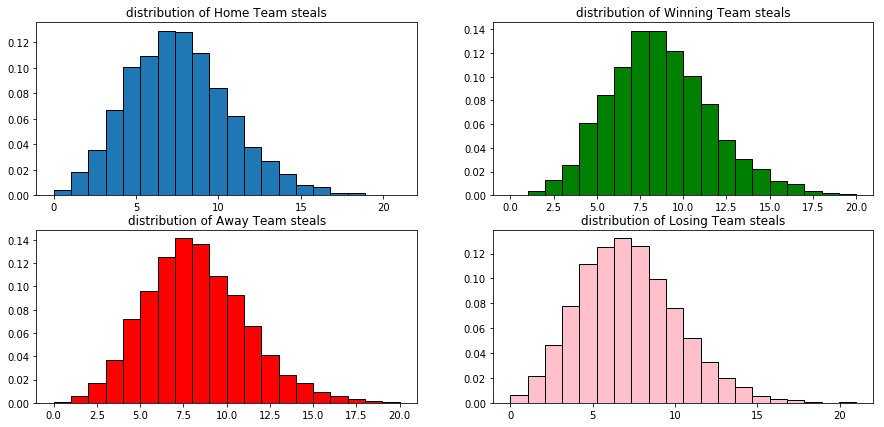

In [21]:
ball['WinSteals'] = np.where(ball['WINorLOSS'] == 'W', ball['Steals'], ball['Opp.Steals'])
ball['LossSteals'] = np.where(ball['WINorLOSS'] == 'L', ball['Steals'], ball['Opp.Steals'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['Steals'], bins = 20, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team steals")
axes[1,0].hist(ball['Opp.Steals'], bins = 20, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team steals")
axes[0,1].hist(ball['WinSteals'], bins = 20, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team steals")
axes[1,1].hist(ball['LossSteals'], bins = 20, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team steals")

plt.show()
plt.clf()

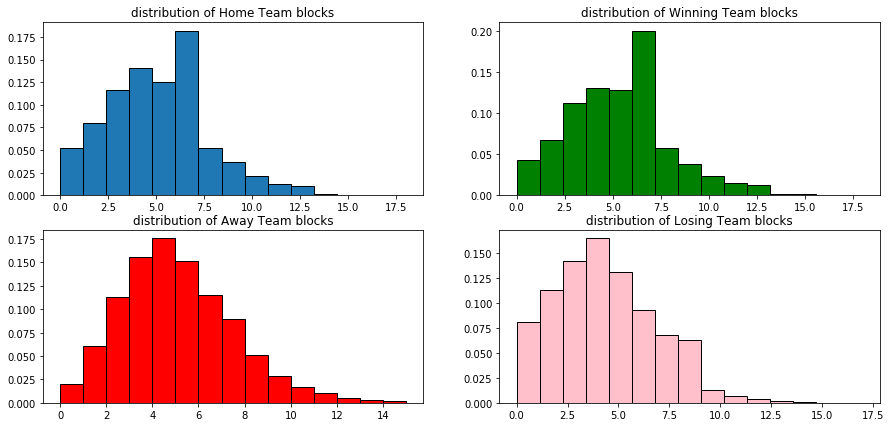

In [22]:
ball['WinBlocks'] = np.where(ball['WINorLOSS'] == 'W', ball['Blocks'], ball['Opp.Blocks'])
ball['LossBlocks'] = np.where(ball['WINorLOSS'] == 'L', ball['Blocks'], ball['Opp.Blocks'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['Blocks'], bins = 15, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team blocks")
axes[1,0].hist(ball['Opp.Blocks'], bins = 15, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team blocks")
axes[0,1].hist(ball['WinBlocks'], bins = 15, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team blocks")
axes[1,1].hist(ball['LossBlocks'], bins = 15, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team blocks")

plt.show()
plt.clf()

#try transform blocks

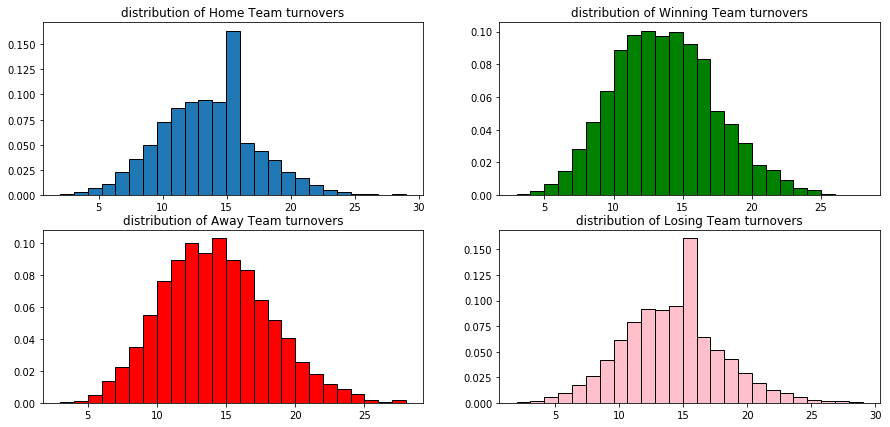

In [25]:
ball['WinTurnovers'] = np.where(ball['WINorLOSS'] == 'W', ball['Turnovers'], ball['Opp.Turnovers'])
ball['LossTurnovers'] = np.where(ball['WINorLOSS'] == 'L', ball['Turnovers'], ball['Opp.Turnovers'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['Turnovers'], bins = 25, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team turnovers")
axes[1,0].hist(ball['Opp.Turnovers'], bins = 25, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team turnovers")
axes[0,1].hist(ball['WinTurnovers'], bins = 25, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team turnovers")
axes[1,1].hist(ball['LossTurnovers'], bins = 25, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team turnovers")

plt.show()
plt.clf()

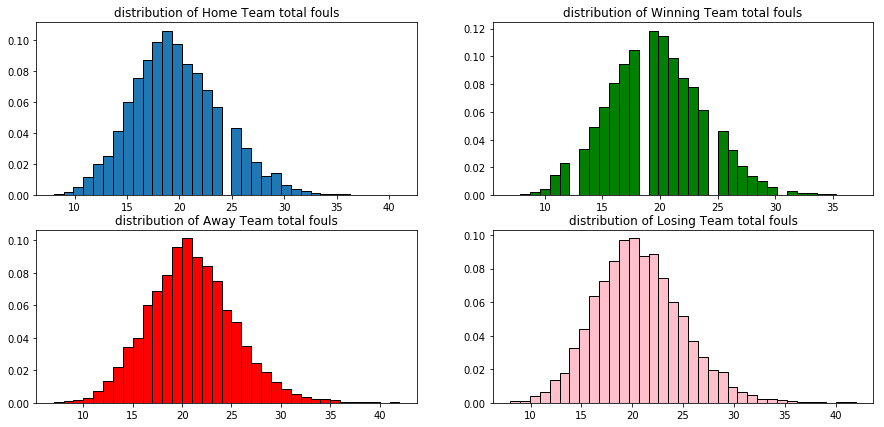

In [26]:
ball['WinTotalFouls'] = np.where(ball['WINorLOSS'] == 'W', ball['TotalFouls'], ball['Opp.TotalFouls'])
ball['LossTotalFouls'] = np.where(ball['WINorLOSS'] == 'L', ball['TotalFouls'], ball['Opp.TotalFouls'])

f, axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(15)

axes[0,0].hist(ball['TotalFouls'], bins = 35, density = True, edgecolor = 'k')
axes[0,0].set_title("distribution of Home Team total fouls")
axes[1,0].hist(ball['Opp.TotalFouls'], bins = 35, color = 'red', density = True, edgecolor = 'k')
axes[1,0].set_title("distribution of Away Team total fouls")
axes[0,1].hist(ball['WinTotalFouls'], bins = 35, color = 'green', density = True, edgecolor = 'k')
axes[0,1].set_title("distribution of Winning Team total fouls")
axes[1,1].hist(ball['LossTotalFouls'], bins = 35, color = 'pink', density = True, edgecolor = 'k')
axes[1,1].set_title("distribution of Losing Team total fouls")

plt.show()
plt.clf()

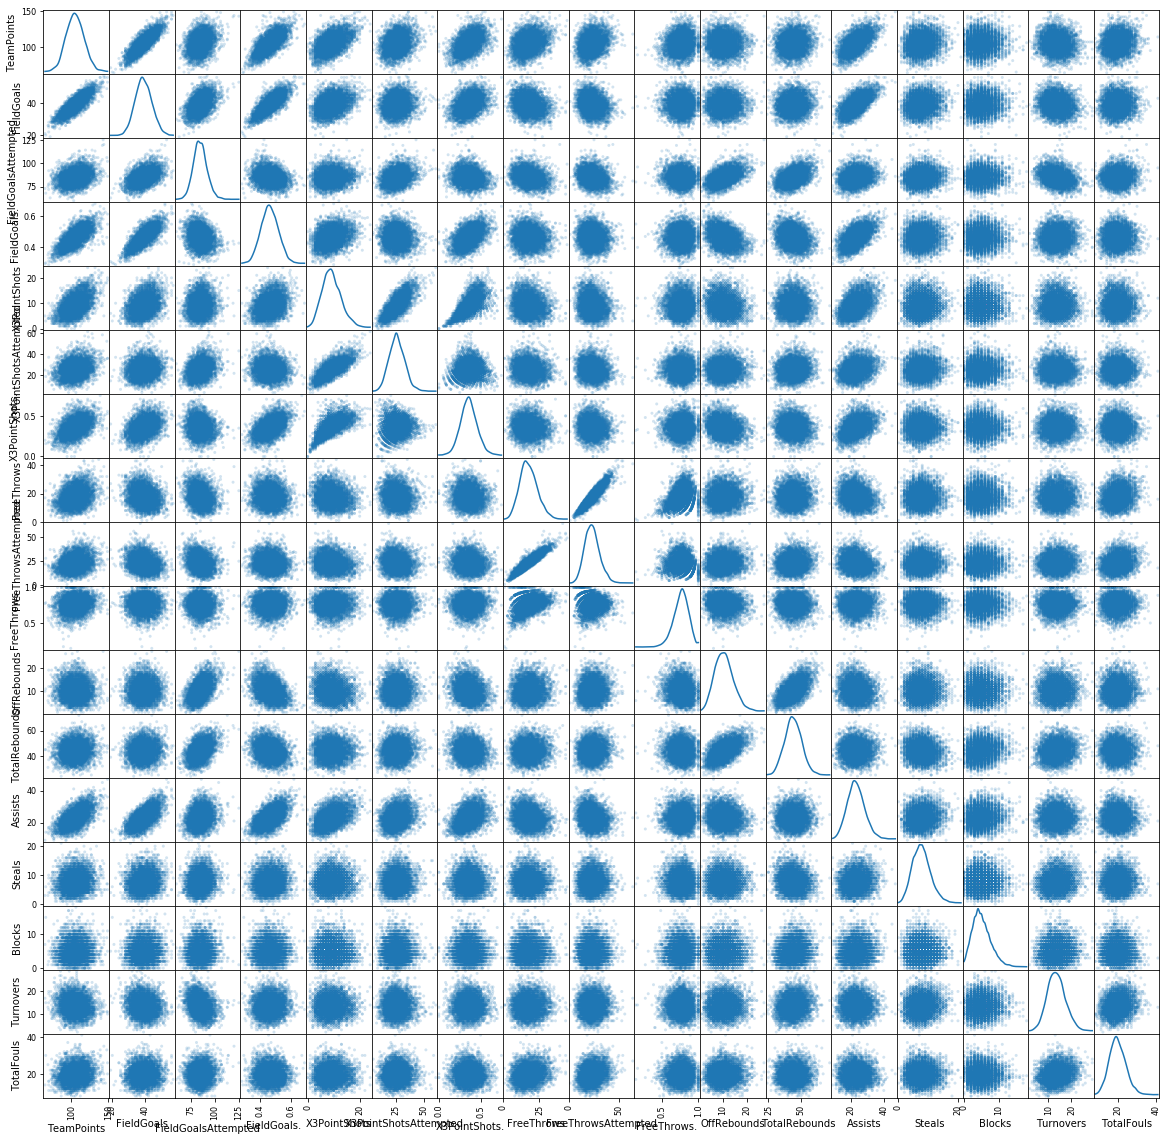

In [27]:
#Relationships between varialbes
from pandas.plotting import scatter_matrix
ball_filt = ball[['TeamPoints', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds', 'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls']]
matrix_scatterplots = scatter_matrix(ball_filt.select_dtypes(exclude=[np.object]), alpha = 0.2, figsize=(20,20), diagonal='kde')

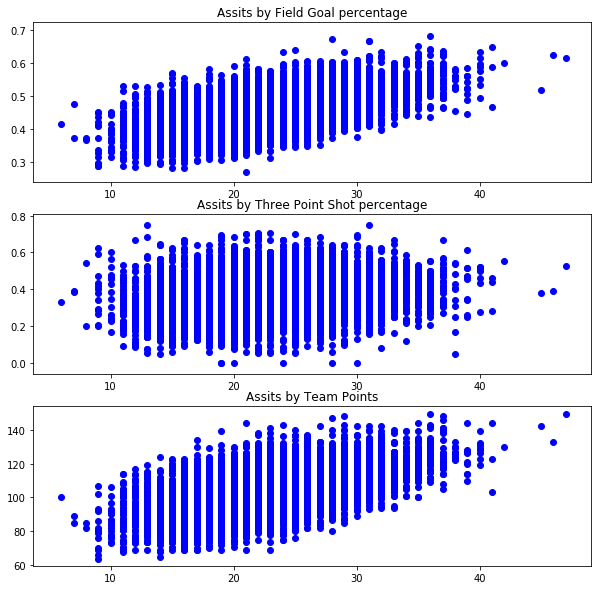

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(3,1)
f.set_figheight(10)
f.set_figwidth(10)

ax1.scatter(ball['Assists'], ball['FieldGoals.'], color = 'b')
ax1.scatter(ball['Opp.Assists'], ball['Opp.FieldGoals.'], color = 'b')
ax1.set_title("Assits by Field Goal percentage")
ax2.scatter(ball['Assists'], ball['X3PointShots.'], color = 'b')
ax2.scatter(ball['Opp.Assists'], ball['X3PointShots.'], color = 'b')
ax2.set_title("Assits by Three Point Shot percentage")
ax3.scatter(ball['Assists'], ball['TeamPoints'], color = 'b')
ax3.scatter(ball['Opp.Assists'], ball['OpponentPoints'], color = 'b')
ax3.set_title("Assits by Team Points")

plt.show()
plt.clf()

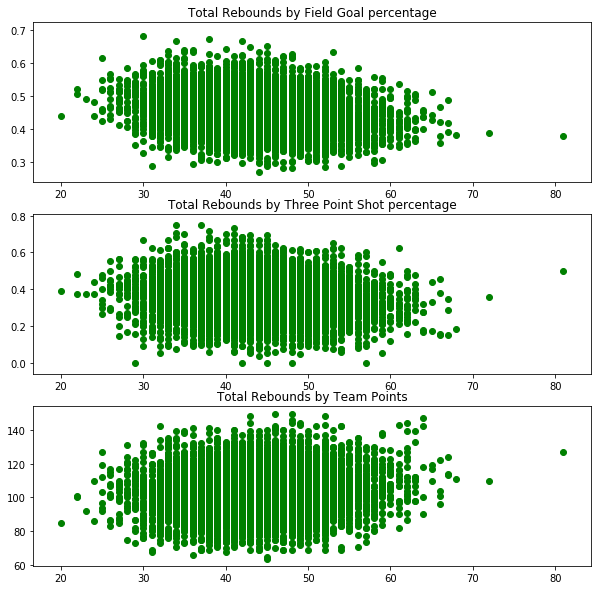

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(3,1)
f.set_figheight(10)
f.set_figwidth(10)

ax1.scatter(ball['TotalRebounds'], ball['FieldGoals.'], color = 'g')
ax1.scatter(ball['Opp.TotalRebounds'], ball['Opp.FieldGoals.'], color = 'g')
ax1.set_title("Total Rebounds by Field Goal percentage")
ax2.scatter(ball['TotalRebounds'], ball['X3PointShots.'], color = 'g')
ax2.scatter(ball['Opp.TotalRebounds'], ball['Opp.3PointShots.'], color = 'g')
ax2.set_title("Total Rebounds by Three Point Shot percentage")
ax3.scatter(ball['TotalRebounds'], ball['TeamPoints'], color = 'g')
ax3.scatter(ball['Opp.TotalRebounds'], ball['OpponentPoints'], color = 'g')
ax3.set_title("Total Rebounds by Team Points")

plt.show()
plt.clf()

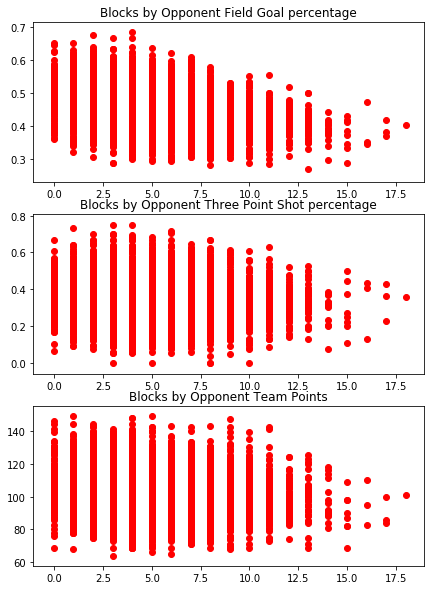

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(3,1)
f.set_figheight(10)
f.set_figwidth(7)

ax1.scatter(ball['Blocks'], ball['Opp.FieldGoals.'], color = 'r')
ax1.scatter(ball['Opp.Blocks'], ball['FieldGoals.'], color = 'r')
ax1.set_title("Blocks by Opponent Field Goal percentage")
ax2.scatter(ball['Blocks'], ball['Opp.3PointShots.'], color = 'r')
ax2.scatter(ball['Opp.Blocks'], ball['X3PointShots.'], color = 'r')
ax2.set_title("Blocks by Opponent Three Point Shot percentage")
ax3.scatter(ball['Blocks'], ball['OpponentPoints'], color = 'r')
ax3.scatter(ball['Opp.Blocks'], ball['TeamPoints'], color = 'r')
ax3.set_title("Blocks by Opponent Team Points")

plt.show()
plt.clf()

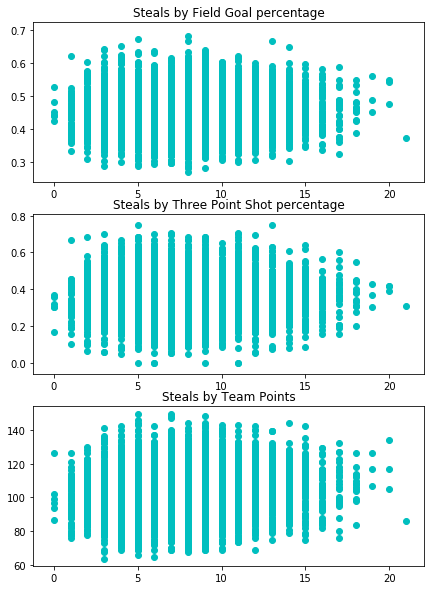

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(3,1)
f.set_figheight(10)
f.set_figwidth(7)

ax1.scatter(ball['Steals'], ball['FieldGoals.'], color = 'c')
ax1.scatter(ball['Opp.Steals'], ball['Opp.FieldGoals.'], color = 'c')
ax1.set_title("Steals by Field Goal percentage")
ax2.scatter(ball['Steals'], ball['X3PointShots.'], color = 'c')
ax2.scatter(ball['Opp.Steals'], ball['X3PointShots.'], color = 'c')
ax2.set_title("Steals by Three Point Shot percentage")
ax3.scatter(ball['Steals'], ball['TeamPoints'], color = 'c')
ax3.scatter(ball['Opp.Steals'], ball['OpponentPoints'], color = 'c')
ax3.set_title("Steals by Team Points")

plt.show()
plt.clf()

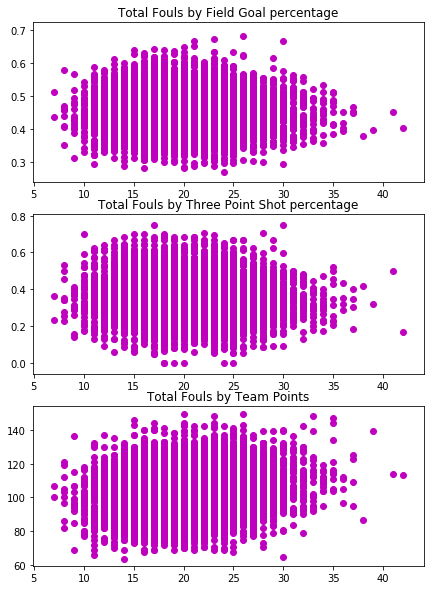

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(3,1)
f.set_figheight(10)
f.set_figwidth(7)

ax1.scatter(ball['TotalFouls'], ball['FieldGoals.'], color = 'm')
ax1.scatter(ball['Opp.TotalFouls'], ball['Opp.FieldGoals.'], color = 'm')
ax1.set_title("Total Fouls by Field Goal percentage")
ax2.scatter(ball['TotalFouls'], ball['X3PointShots.'], color = 'm')
ax2.scatter(ball['Opp.TotalFouls'], ball['X3PointShots.'], color = 'm')
ax2.set_title("Total Fouls by Three Point Shot percentage")
ax3.scatter(ball['TotalFouls'], ball['TeamPoints'], color = 'm')
ax3.scatter(ball['Opp.TotalFouls'], ball['OpponentPoints'], color = 'm')
ax3.set_title("Total Fouls by Team Points")

plt.show()
plt.clf()

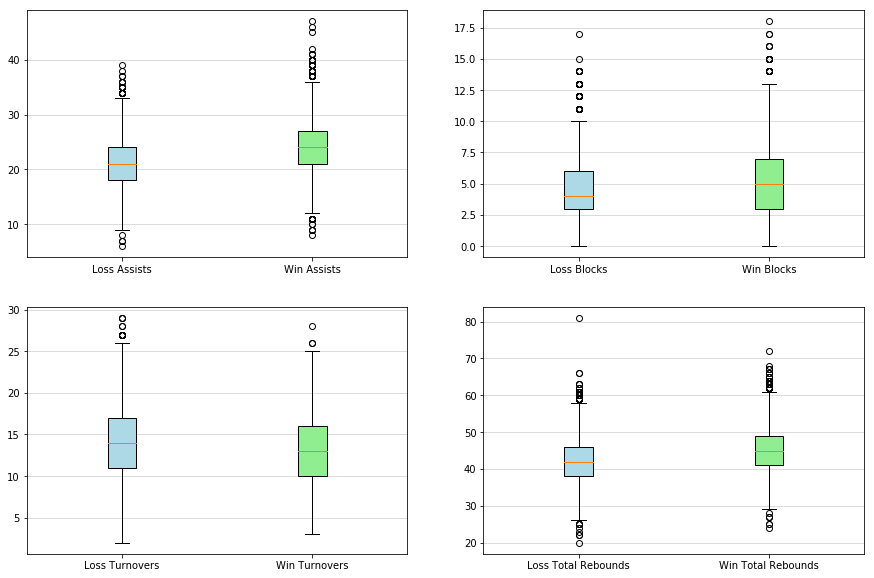

In [33]:
f, axes = plt.subplots(2,2)
f.set_figheight(10)
f.set_figwidth(15)

plot1 = axes[0,0].boxplot(np.asanyarray(ball[['LossAssists', 'WinAssists']]), patch_artist = True)
axes[0,0].set_xticklabels(['Loss Assists', 'Win Assists'])
axes[0,0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')
plot2 = axes[0,1].boxplot(np.asanyarray(ball[['LossBlocks', 'WinBlocks']]), patch_artist = True)
axes[0,1].set_xticklabels(['Loss Blocks', 'Win Blocks'])
axes[0,1].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')
plot3 = axes[1,0].boxplot(np.asanyarray(ball[['LossTurnovers', 'WinTurnovers']]), patch_artist = True)
axes[1,0].set_xticklabels(['Loss Turnovers', 'Win Turnovers'])
axes[1,0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')
plot4 = axes[1,1].boxplot(np.asanyarray(ball[['LossTotalRebounds', 'WinTotalRebounds']]), patch_artist = True)
axes[1,1].set_xticklabels(['Loss Total Rebounds','Win Total Rebounds'])
axes[1,1].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')

colors = ['lightblue', 'lightgreen']
for bplot in (plot1, plot2, plot3, plot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
plt.show()
plt.clf()

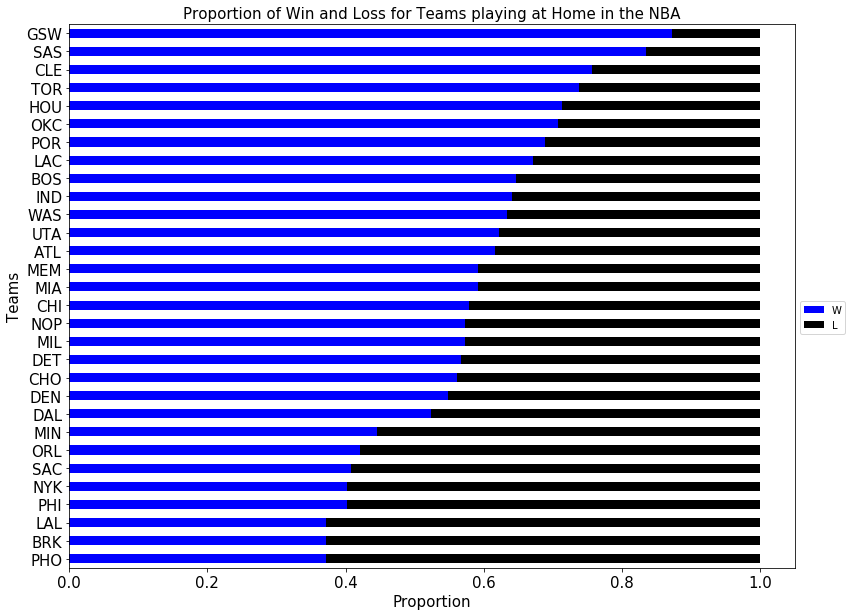

In [34]:
from __future__ import division

teams = np.array(ball.Team.unique())
target = np.array(ball.WINorLOSS.unique())
df = pd.DataFrame(columns = target, index = teams)

for i in range(0, len(teams)):
    x = [sum((ball.Team == teams[i]) & (ball.WINorLOSS == target[0]))/sum((ball.Team == teams[i])), sum((ball.Team == teams[i]) & (ball.WINorLOSS == target[1]))/sum((ball.Team == teams[i]))]
    x = np.transpose(x)
    df.loc[teams[i]] = x

df = df.sort_values(by = 'L', ascending = 0)
df = df.plot.barh(stacked=True, figsize = (13,10), color = ['b','k']);
df.set_title('Proportion of Win and Loss for Teams playing at Home in the NBA', size = 15)
df.set_xlabel('Proportion', fontsize = 15)
df.set_ylabel('Teams', fontsize = 15)
 
# Show graphic
plt.legend(bbox_to_anchor=(1.0, 0.5), fontsize = 10)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

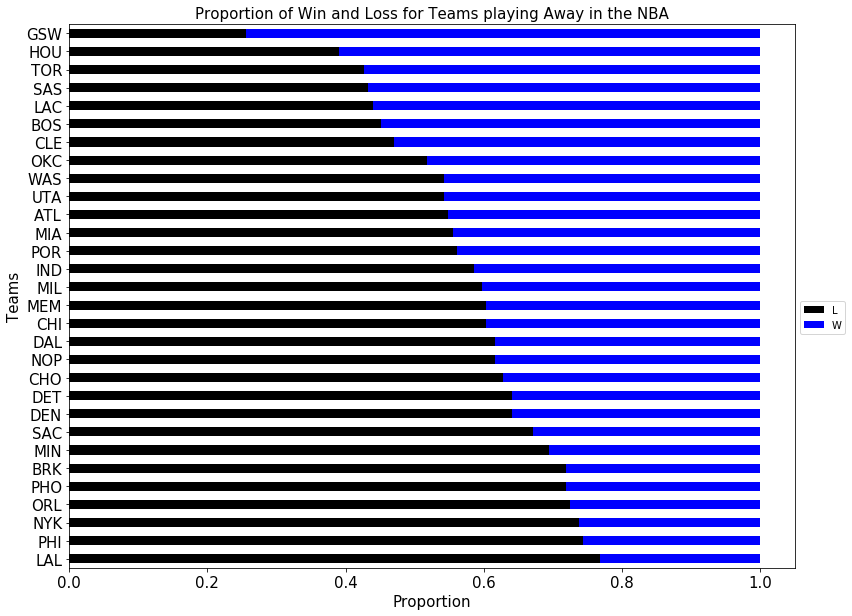

In [35]:
ball_away = ball_original[(ball_original['Home'] == "Away")]

teams = np.array(ball_away.Team.unique())
target = np.array(ball_away.WINorLOSS.unique())
df = pd.DataFrame(columns = target, index = teams)

for i in range(0, len(teams)):
    x = [sum((ball_away.Team == teams[i]) & (ball_away.WINorLOSS == target[0]))/sum((ball_away.Team == teams[i])), sum((ball_away.Team == teams[i]) & (ball_away.WINorLOSS == target[1]))/sum((ball_away.Team == teams[i]))]
    x = np.transpose(x)
    df.loc[teams[i]] = x

df = df.sort_values(by = 'L', ascending = 0)
df = df.plot.barh(stacked=True, figsize = (13,10), color = ['k','b']);
df.set_title('Proportion of Win and Loss for Teams playing Away in the NBA', size = 15)
df.set_xlabel('Proportion', fontsize = 15)
df.set_ylabel('Teams', fontsize = 15)
 
# Show graphic
plt.legend(bbox_to_anchor=(1.0, 0.5), fontsize = 10)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

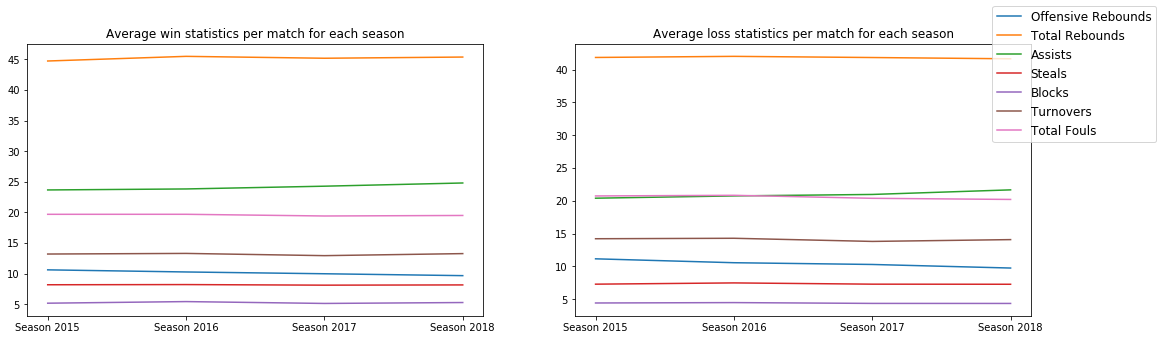

In [36]:
import warnings; warnings.simplefilter('ignore')
import matplotlib.patches as mpatches

f, (ax1, ax2) = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(18)

SeasonStats = pd.DataFrame()
StatTimeSeries = ball[['Date','WinOffRebounds', 'LossOffRebounds', 'WinTotalRebounds', 'LossTotalRebounds', 'WinAssists', 'LossAssists', 'WinSteals', 'LossSteals', 'WinBlocks', 'LossBlocks', 'WinTurnovers', 'LossTurnovers', 'WinTotalFouls', 'LossTotalFouls']]
StatTimeSeries.sort_values(by = ['Date'])
StatTimeSeries.sum(axis = 0)

Season15 = StatTimeSeries[(datelist < '2015-08-01')]
Season15 = Season15.sum(axis=0)/Season15.count(axis=0)
SeasonStats = SeasonStats.append(Season15, ignore_index = True)
Season16 = StatTimeSeries[(datelist > '2015-08-01') & (datelist <= '2016-08-01')]
Season16 = Season16.sum(axis=0)/Season16.count(axis=0)
SeasonStats = SeasonStats.append(Season16, ignore_index = True)
Season17 = StatTimeSeries[(datelist > '2016-08-01') & (datelist <= '2017-08-01')]
Season17 = Season17.sum(axis=0)/Season17.count(axis=0)
SeasonStats = SeasonStats.append(Season17, ignore_index = True)
Season18 = StatTimeSeries[(datelist > '2017-08-01') & (datelist <= datelist.max())]
Season18 = Season18.sum(axis=0)/Season18.count(axis=0)
SeasonStats = SeasonStats.append(Season18, ignore_index = True)
SeasonStats = SeasonStats.drop('Date',axis=1)
Seasons = ['Season 2015','Season 2016','Season 2017','Season 2018']
SeasonStats['Season'] = Seasons

ax1.plot(SeasonStats['Season'], SeasonStats[['WinOffRebounds', 'WinTotalRebounds', 'WinAssists', 'WinSteals', 'WinBlocks', 'WinTurnovers', 'WinTotalFouls']])
ax1.set_title('Average win statistics per match for each season')
ax2.plot(SeasonStats['Season'], SeasonStats[['LossOffRebounds', 'LossTotalRebounds', 'LossAssists', 'LossSteals', 'LossBlocks', 'LossTurnovers', 'LossTotalFouls']])
ax2.set_title('Average loss statistics per match for each season')
f.legend(['Offensive Rebounds', 'Total Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Total Fouls'], loc = 0, fontsize = 12)

plt.show()

In [37]:
#Initial classification model containing all features from dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

target = pd.DataFrame(ball['WINorLOSS'])
#Dataset containing all variables
data = pd.DataFrame(ball[['FieldGoals.', 'X3PointShots.', 'FreeThrows.','OffRebounds', 'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls', 'Opp.FieldGoals.', 'Opp.3PointShots.', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds','Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls']])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)
clf = KNeighborsClassifier(3, weights='uniform', p=1)
fit = clf.fit(X_train, np.ravel(y_train,order='C'))
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print cm
print classification_report(y_test, predicted)

[[393 213]
 [138 732]]
             precision    recall  f1-score   support

          L       0.74      0.65      0.69       606
          W       0.77      0.84      0.81       870

avg / total       0.76      0.76      0.76      1476



knn - 1 with 4 features [1, 10, 9, 0]  predictive value: 0.6469221835075494
knn - 2 with 4 features [13, 10, 14, 0]  predictive value: 0.6056910569105691
knn - 3 with 6 features [12, 8, 0, 11, 1, 10]  predictive value: 0.6103368176538908
knn - 4 with 14 features [8, 6, 18, 10, 15, 17, 1, 14, 5, 0, 4, 13, 3, 7]  predictive value: 0.7505807200929152
knn - 5 with 3 features [10, 13, 0]  predictive value: 0.6852497096399536
knn - 6 with 5 features [1, 15, 11, 10, 0]  predictive value: 0.747096399535424
knn - 7 with 4 features [0, 17, 11, 10]  predictive value: 0.6498257839721254
knn - 8 with 7 features [18, 5, 10, 0, 14, 4, 15]  predictive value: 0.7244483159117305
knn - 9 with 16 features [3, 7, 18, 9, 2, 13, 15, 11, 0, 4, 10, 8, 17, 14, 1, 5]  predictive value: 0.7833914053426249
knn - 10 with 4 features [0, 3, 11, 10]  predictive value: 0.7398373983739838


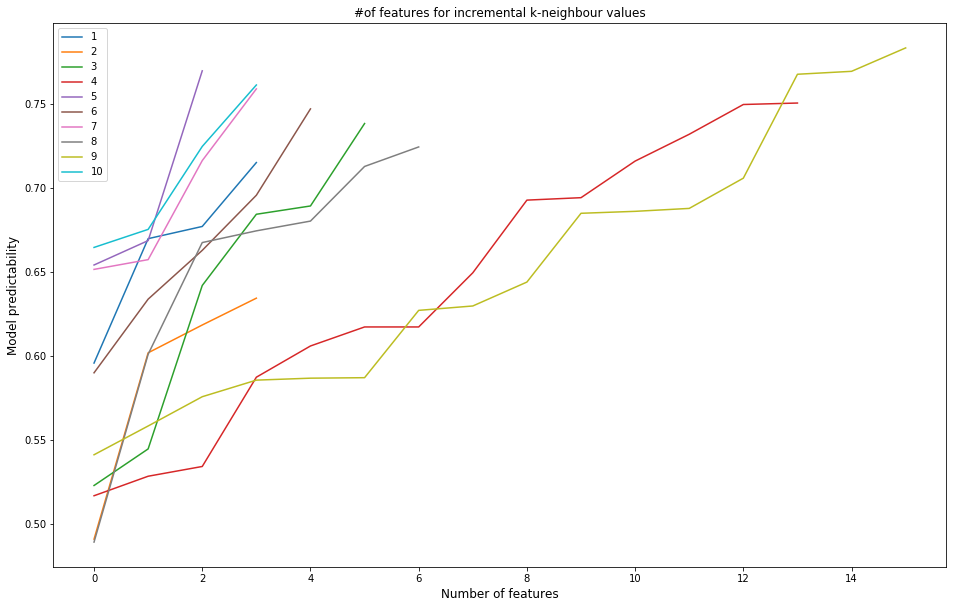

In [38]:
#Hill climbing method to choose features
from sklearn.utils import shuffle
import numpy as np

knn = np.zeros(shape=(20,10))
col_num = data.shape[1]
data_array = data.values
target_array = target.values

for k in range(0, 10):
    x=0
    new_Ind = []
    cur_MaxScore = 0.0
    col_Ind_Random = shuffle(range(0,col_num))
    for cur_f in range(0, col_num):
        new_Ind.append(col_Ind_Random[cur_f])
        newData = data_array[:, new_Ind]
        X_train, X_test, y_train, y_test = train_test_split(newData, target_array, test_size = 0.7, random_state = 0)
        clf = KNeighborsClassifier(k+1, weights = 'uniform', p=1)
        fit = clf.fit(X_train, np.ravel(y_train,order='C'))
        cur_Score = clf.score(X_test, y_test)
        if cur_Score < cur_MaxScore:
            new_Ind.remove(col_Ind_Random[cur_f])
        else:
            cur_MaxScore = cur_Score
            knn[x][k] = cur_Score
            x = x+1
    print 'knn -', k+1,"with", str(len(new_Ind)), 'features', new_Ind," predictive value: " + str(cur_Score)

knn[knn == 0] = np.nan            
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(16)

ax.plot(knn)
ax.legend(labels = {1,2,3,4,5,6,7,8,9,10})
ax.set_title('#of features for incremental k-neighbour values' , size =12)
ax.set_xlabel('Number of features', size = 12)
ax.set_ylabel('Model predictability', size = 12)
plt.show()
plt.clf()

In [39]:
#Realise hill climbing method was returning features directly related to point value (Field goal & 3 Point shot percentage) as main predictors
#Ran model without these features because including them in the model seems too obvious.
#Ran to get an idea
data_reduction = pd.DataFrame(ball[['OffRebounds', 'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls', 'Opp.OffRebounds', 'Opp.TotalRebounds','Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls']])

X_train, X_test, y_train, y_test = train_test_split(data_reduction, target, test_size = 0.3)
clf = KNeighborsClassifier(3, weights='uniform', p=2)
fit = clf.fit(X_train, np.ravel(y_train,order='C'))
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print cm
print classification_report(y_test, predicted)

[[428 196]
 [148 704]]
             precision    recall  f1-score   support

          L       0.74      0.69      0.71       624
          W       0.78      0.83      0.80       852

avg / total       0.77      0.77      0.77      1476



knn - 1 with 11 features [11, 1, 2, 8, 4, 7, 9, 12, 5, 0, 3]  predictive value: 0.7296747967479674
knn - 2 with 10 features [4, 11, 2, 12, 6, 9, 1, 8, 5, 0]  predictive value: 0.695993031358885
knn - 3 with 14 features [11, 8, 6, 13, 2, 12, 9, 3, 1, 0, 10, 4, 7, 5]  predictive value: 0.7531939605110337
knn - 4 with 10 features [7, 6, 12, 4, 5, 1, 8, 9, 2, 11]  predictive value: 0.733739837398374
knn - 5 with 12 features [9, 12, 0, 1, 2, 6, 5, 11, 8, 3, 4, 13]  predictive value: 0.7630662020905923
knn - 6 with 10 features [9, 11, 1, 5, 6, 12, 13, 2, 8, 3]  predictive value: 0.7412891986062717
knn - 7 with 11 features [6, 2, 10, 1, 13, 12, 8, 7, 3, 4, 9]  predictive value: 0.759581881533101
knn - 8 with 10 features [5, 1, 0, 6, 7, 2, 9, 8, 3, 12]  predictive value: 0.7822299651567944
knn - 9 with 13 features [3, 8, 5, 13, 2, 12, 6, 1, 9, 4, 0, 11, 7]  predictive value: 0.7874564459930313
knn - 10 with 8 features [5, 8, 1, 7, 0, 11, 12, 2]  predictive value: 0.7784552845528455


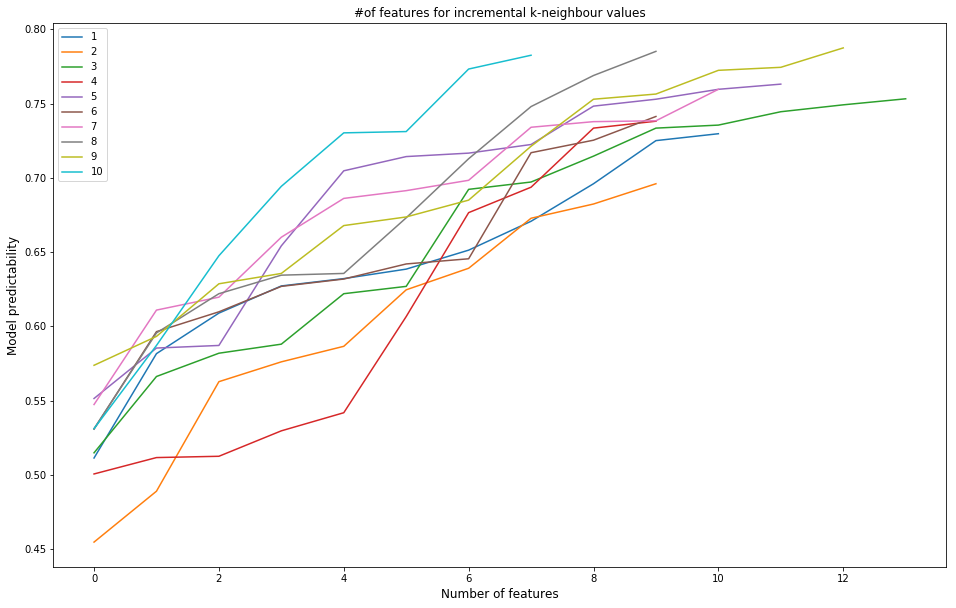

In [40]:
#Hill climbing method with Field goal & 3 Point shot percentage removed from model
knn = np.zeros(shape=(20,10))
col_num = data_reduction.shape[1]
data_reduction_array = data_reduction.values
feature_list = list()

for k in range(0, 10):
    x=0
    new_Ind = []
    cur_MaxScore = 0.0
    col_Ind_Random = shuffle(range(0,col_num))
    for cur_f in range(0, col_num):
        new_Ind.append(col_Ind_Random[cur_f])
        newData = data_reduction_array[:, new_Ind]
        X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size = 0.7, random_state = 0)
        clf = KNeighborsClassifier(k+1, weights = 'uniform', p=2)
        fit = clf.fit(X_train, np.ravel(y_train,order='C'))
        cur_Score = clf.score(X_test, y_test)
        if cur_Score < cur_MaxScore:
            new_Ind.remove(col_Ind_Random[cur_f])
        else:
            cur_MaxScore = cur_Score
            knn[x][k] = cur_Score
            x = x+1
    print 'knn -', k+1,"with", str(len(new_Ind)), 'features', new_Ind," predictive value: " + str(cur_Score)
    feature_list.extend(new_Ind)

knn[knn == 0] = np.nan            
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(16)

ax.plot(knn)
ax.legend(labels = {1,2,3,4,5,6,7,8,9,10})
ax.set_title('#of features for incremental k-neighbour values' , size =12)
ax.set_xlabel('Number of features', size = 12)
ax.set_ylabel('Model predictability', size = 12)
plt.show()
plt.clf()

In [41]:
print pd.Series(feature_list).value_counts()

12    10
8     10
2     10
1     10
9      9
5      9
11     8
6      8
7      7
4      7
3      7
0      7
13     5
10     2
dtype: int64


In [42]:
#From hill climbing method determined a K-value, p-value and features to include in model
#Cross validation on new model (8 features, none directly associated with points)
data_further_reduction = pd.DataFrame(ball[['Assists', 'Blocks', 'TotalRebounds', 'Steals', 'Opp.Assists', 'Opp.Blocks','Opp.TotalRebounds','Opp.Steals']])
data_further_reduction_array = data_further_reduction.values
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = 4)
x = 0
for train_index, test_index in kf.split(data_reduction):
    X_train, X_test = data_further_reduction_array[train_index], data_further_reduction_array[test_index]
    y_train, y_test = target_array[train_index], target_array[test_index]
    clf = KNeighborsClassifier(10, weights = 'uniform', p=2)
    fit = clf.fit(X_train, np.ravel(y_train,order='C'))
    predicted = fit.predict(X_test)
    clf.fit(X_train, np.ravel(y_train,order='C'))
    print 'fold', x+1,'score:', clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, predicted)
    print 'Confusion Matrix\n', cm
    x = x + 1
    print classification_report(y_test, predicted)


fold 1 score: 0.7367886178861789
Confusion Matrix
[[297 112]
 [147 428]]
             precision    recall  f1-score   support

          L       0.67      0.73      0.70       409
          W       0.79      0.74      0.77       575

avg / total       0.74      0.74      0.74       984

fold 2 score: 0.7530487804878049
Confusion Matrix
[[305 115]
 [128 436]]
             precision    recall  f1-score   support

          L       0.70      0.73      0.72       420
          W       0.79      0.77      0.78       564

avg / total       0.75      0.75      0.75       984

fold 3 score: 0.7520325203252033
Confusion Matrix
[[310 107]
 [137 430]]
             precision    recall  f1-score   support

          L       0.69      0.74      0.72       417
          W       0.80      0.76      0.78       567

avg / total       0.76      0.75      0.75       984

fold 4 score: 0.7357723577235772
Confusion Matrix
[[292 135]
 [125 432]]
             precision    recall  f1-score   support

         

In [43]:
#Final KNN classification model
X_train, X_test, y_train, y_test = train_test_split(data_further_reduction_array, target_array, test_size = 0.25)
clf = KNeighborsClassifier(10, weights='uniform', p=2)
fit = clf.fit(X_train, np.ravel(y_train,order='C'))
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print cm
print classification_report(y_test, predicted)

[[383 139]
 [174 534]]
             precision    recall  f1-score   support

          L       0.69      0.73      0.71       522
          W       0.79      0.75      0.77       708

avg / total       0.75      0.75      0.75      1230

